In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

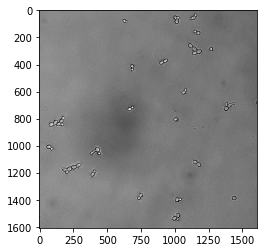

In [160]:
path = "/home/ravitha/D/Datasets/YeastDataset/"
image = plt.imread(path+'Image_3.tif')
image.shape
plt.imshow(image, cmap='gray')

In [162]:
print(image.shape)

(1608, 1608)


(1608, 1608)
Min:39
Max:232


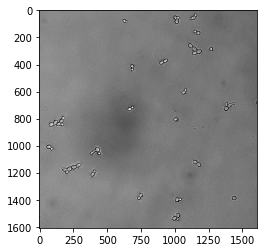

In [163]:
gray = rgb2gray(image)
print(gray.shape)
plt.imshow(gray, cmap='gray')

print('Min:'+str(np.min(gray)))
print('Max:'+str(np.max(gray)))

# Thresholding

In [67]:
# Using the mean pixel value as threshold
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
m=gray_r.mean()

In [ ]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > m:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray_r = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray_r, cmap='gray')

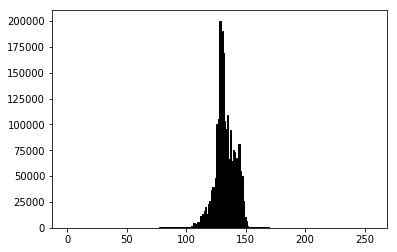

In [164]:
plt.hist(gray.ravel(), bins=256, range=(0, 256), fc='k', ec='k')
plt.show()

/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


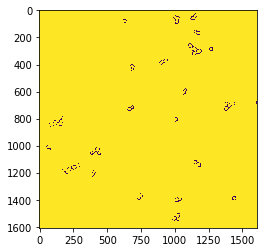

In [165]:
import scipy.misc
seg=gray>100
seg1 = gray<0.6
'''
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.imshow(seg, cmap='gray')
ax.set_title('Using Threshold as 0.4')

ax = axs[1]
ax.imshow(seg1, cmap='gray')
ax.set_title('Using Threshold as 0.6')
'''

plt.imshow(seg)
seg = seg * 255
scipy.misc.imsave(path+'segImage03.jpg',seg )

## Automatic Thresholding

### SAUVOLA Thresholding

/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


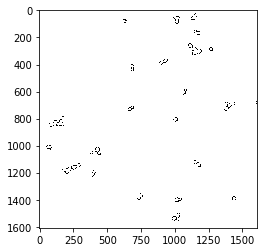

In [210]:
import skimage.filters as filters

TH = filters.threshold_sauvola(gray)
plt.imshow(gray>TH, cmap='gray')
seg=gray>TH
seg = seg * 255
strPath=path+'Final.jpg'
scipy.misc.imsave(strPath,seg )

# Edge Detection

In [11]:
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [12]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

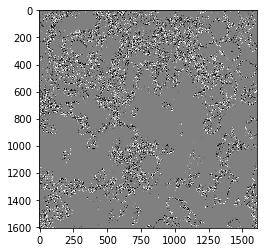

In [13]:
plt.imshow(out_h, cmap='gray')

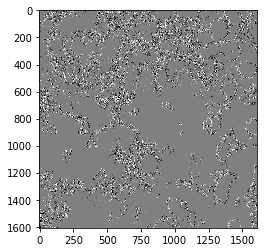

In [14]:
plt.imshow(out_v, cmap='gray')

## Laplace Operator

In [15]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


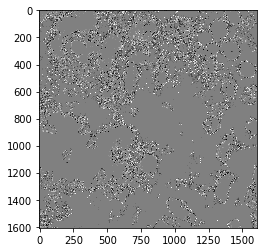

In [16]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# Segmentation based on Clustering

In [166]:
# Normalize between 0 to 1
gray_normalize = gray/255.0

In [167]:
# Reshape into two dimensional image (image height * image width, numofchannels)
gray_pic = gray_normalize.reshape(gray_normalize.shape[0]*gray_normalize.shape[1],1)

In [168]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(gray_pic)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

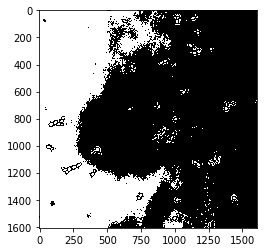

In [169]:
pic=gray_normalize
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1])
plt.imshow(cluster_pic,'gray')

# -------------------------------------------------------------------------
# Apply Sauvola to all the images in the repository
# -------------------------------------------------------------------------

In [219]:
import os
import skimage.filters as filters
import cv2

path ='/home/ravitha/D/Datasets/YeastDataset'
Finalpath = '/home/ravitha/D/Datasets/YeastDataset/Results-Sauvola'
for img in os.listdir(path):
    if 'tif' in img:
        imgPath = path+'/'+img
        # Read an image
        image = plt.imread(imgPath)
        gray = rgb2gray(image)
        TH = filters.threshold_sauvola(gray)
        seg=gray>TH
        seg = seg * 255
        strPath=Finalpath+'/'+img
        scipy.misc.imsave(strPath,seg )

/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


# Active Contour Segmentation

In [222]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

In [244]:
points = circle_points(200, [950, 570], 50)[:-1]

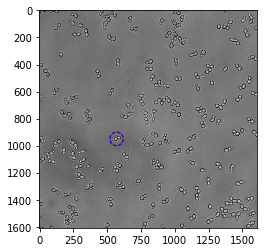

In [245]:
import skimage.segmentation as seg

fig=plt.imshow(gray, cmap='gray')
plt.plot(points[:,0],points[:,1], '--r', lw=1)

snake = seg.active_contour(gray, points)
plt.plot(snake[:,0],snake[:,1], '--b', lw=1)

# Felzenszwalb Algorithm

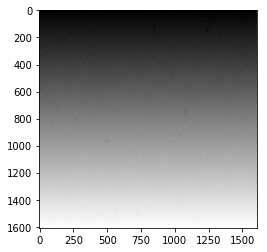

In [247]:
image_felzenszwalb = seg.felzenszwalb(gray) 
plt.imshow(image_felzenszwalb, cmap='gray')

In [248]:
np.unique(image_felzenszwalb).size

32332

In [249]:
import skimage.color as color
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')

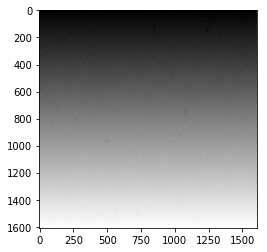

In [250]:
plt.imshow(image_felzenszwalb, cmap='gray')